In [1]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
print(os.listdir("../input/chest-xray-pneumonia/chest_xray/chest_xray/"))


['train', 'val', '.DS_Store', 'test']


In [2]:
print(os.listdir("../input/chest-xray-pneumonia/chest_xray/chest_xray/train/"))


['NORMAL', '.DS_Store', 'PNEUMONIA']


In [3]:
TRAIN_DIR = "../input/chest-xray-pneumonia/chest_xray/chest_xray/train/"
TEST_DIR =  "../input/chest-xray-pneumonia/chest_xray/chest_xray/test/"

Preprocessing

> 

In [4]:
def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['NORMAL']:
                label = 0
            elif nextdir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
    return nextdir, label

In [5]:
def preprocessing_data(Dir):
    X = []
    y = []
    
    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir + nextdir
        
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = skimage.transform.resize(img, (150, 150, 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label)
            
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X,y

In [6]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [7]:
X_train, y_train = get_data(TRAIN_DIR)


100%|██████████| 3876/3876 [12:18<00:00,  5.12it/s]


In [8]:
X_test , y_test = get_data(TEST_DIR)


100%|██████████| 390/390 [01:00<00:00,  6.47it/s]


In [9]:
print(X_train.shape,'\n',X_test.shape)


(5216, 150, 150, 3) 
 (624, 150, 150, 3)


In [10]:
print(y_train.shape,'\n',y_test.shape)


(5216,) 
 (624,)


In [11]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

Using TensorFlow backend.


In [12]:
print(y_train.shape,'\n',y_test.shape)


(5216, 2) 
 (624, 2)


In [13]:
Pimages = os.listdir(TRAIN_DIR + "PNEUMONIA")
Nimages = os.listdir(TRAIN_DIR + "NORMAL")

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


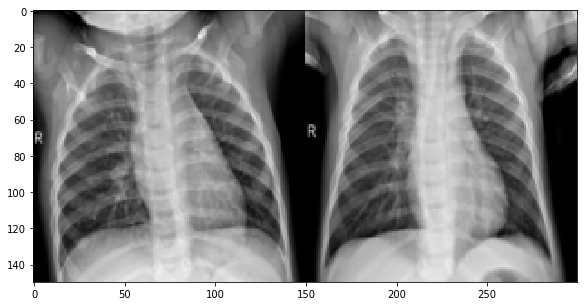

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


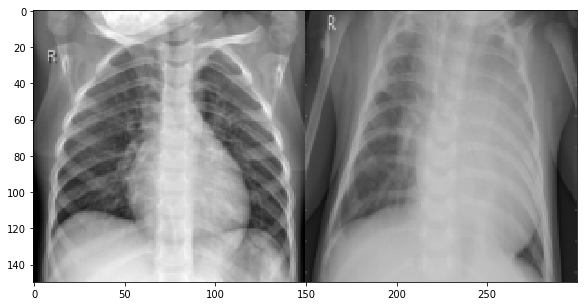

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


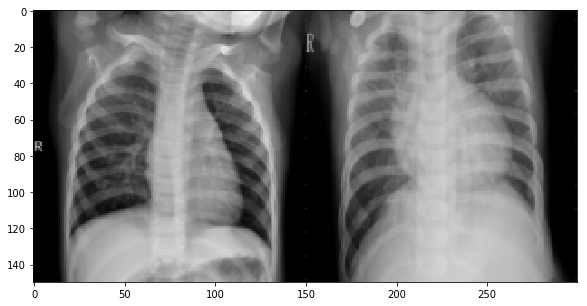

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


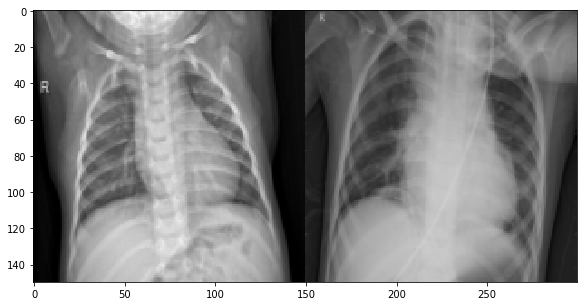

(Left) - No Pneumonia Vs (Right) - Pneumonia
-----------------------------------------------------------------------------------------------------------------------------------


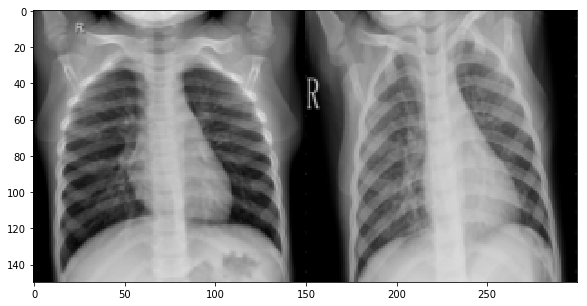

In [14]:
import matplotlib.pyplot as plt
def plotter(i):
    imagep1 = cv2.imread(TRAIN_DIR+"PNEUMONIA/"+Pimages[i])
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
    imagen1 = cv2.imread(TRAIN_DIR+"NORMAL/"+Nimages[i])
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No Pneumonia Vs (Right) - Pneumonia")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

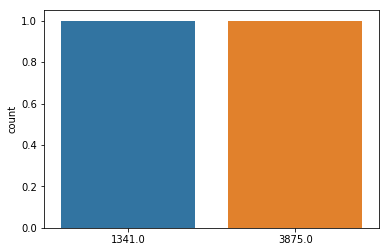

In [15]:
import seaborn as sns
count = y_train.sum(axis = 0)
sns.countplot(x = count)

In [16]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

/opt/conda/lib/python3.6/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [17]:
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [18]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [19]:
X_train=X_train.reshape(5216,3,150,150)
X_test=X_test.reshape(624,3,150,150)

In [20]:


from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(filters =32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (3,150,150)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(2, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 150, 150)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 150, 150)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 75, 75)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 75, 75)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 75, 75)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 75, 75)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 37, 37)        0         
__________

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

> **Train the Model**

We train our model in the code cell below.  Notice that I am using model checkpointing to save the model that attains the best validation loss.

In [22]:
epochs = 20
batch_size = 15

checkpointer = ModelCheckpoint(filepath="weights.hdf5", 
                              verbose=1, save_best_only=True)

model.fit(X_train, y_train, 
          validation_data=(X_test , y_test),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)

Train on 5216 samples, validate on 624 samples
Epoch 1/20
5216/5216 [==============================] - 14s 3ms/step - loss: 4.1372 - acc: 0.7418 - val_loss: 6.0443 - val_acc: 0.6250

Epoch 00001: val_loss improved from inf to 6.04429, saving model to weights.hdf5
Epoch 2/20
5216/5216 [==============================] - 11s 2ms/step - loss: 4.1439 - acc: 0.7429 - val_loss: 6.0443 - val_acc: 0.6250

Epoch 00002: val_loss did not improve from 6.04429
Epoch 3/20
5216/5216 [==============================] - 11s 2ms/step - loss: 4.1439 - acc: 0.7429 - val_loss: 6.0443 - val_acc: 0.6250

Epoch 00003: val_loss did not improve from 6.04429
Epoch 4/20
5216/5216 [==============================] - 11s 2ms/step - loss: 4.1439 - acc: 0.7429 - val_loss: 6.0443 - val_acc: 0.6250

Epoch 00004: val_loss did not improve from 6.04429
Epoch 5/20
5216/5216 [==============================] - 11s 2ms/step - loss: 4.1439 - acc: 0.7429 - val_loss: 6.0443 - val_acc: 0.6250

Epoch 00005: val_loss did not improve f


Epoch 00017: ReduceLROnPlateau reducing learning rate to 1.000000045813705e-19.

Epoch 00017: val_acc did not improve from 0.62500
Epoch 18/20
5216/5216 [==============================] - 9s 2ms/step - loss: 4.1439 - acc: 0.7429 - val_loss: 6.0443 - val_acc: 0.6250

Epoch 00018: ReduceLROnPlateau reducing learning rate to 1.000000032889008e-20.

Epoch 00018: val_acc did not improve from 0.62500
Epoch 19/20
5216/5216 [==============================] - 9s 2ms/step - loss: 4.1439 - acc: 0.7429 - val_loss: 6.0443 - val_acc: 0.6250

Epoch 00019: ReduceLROnPlateau reducing learning rate to 1.0000000490448793e-21.

Epoch 00019: val_acc did not improve from 0.62500
Epoch 20/20
5216/5216 [==============================] - 9s 2ms/step - loss: 4.1439 - acc: 0.7429 - val_loss: 6.0443 - val_acc: 0.6250

Epoch 00020: ReduceLROnPlateau reducing learning rate to 1.0000000692397185e-22.

Epoch 00020: val_acc did not improve from 0.62500


In [23]:
model.load_weights('weights.hdf5')

In [24]:
# Evaluation on test dataset
test_data = np.array(X_test)
test_labels = np.array(y_test)
test_loss, test_score = model.evaluate(test_data, y_test, batch_size=16)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

624/624 [==============================] - 0s 721us/step
Loss on test set:  6.04428584759052
Accuracy on test set:  0.625


In [25]:
X_train=X_train.reshape(5216,3,150,150)
X_test=X_test.reshape(624,3,150,150)

In [26]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras.backend as K
from keras.layers import Activation, Conv2D, Input
from keras.layers.normalization import BatchNormalization

# declare network model with channels last: NO ERROR
K.set_image_data_format('channels_last')
input = Input(shape=(3, 150,150), dtype='float32')
x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same')(input)
x = BatchNormalization(axis=3)(x)
x = Activation('relu')(x)

In [27]:
from keras.applications.inception_v3 import InceptionV3
# create the base pre-trained model
base_model = InceptionV3(weights=None, include_top=False , input_shape=(150, 150,3))

In [28]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 74, 74, 32)   96          conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation_2 (Activation)       (None, 74, 74, 32)   0           batch_normalization_2[0][0]      
__________________________________________________________________________________________________
conv2d_7 (

In [29]:
type(base_model)

keras.engine.training.Model

In [30]:
base_model = Sequential()
base_model.add(GlobalAveragePooling2D(input_shape=X_train.shape[1:]))
base_model.add(Dense(2, activation='softmax'))

base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 302       
Total params: 302
Trainable params: 302
Non-trainable params: 0
_________________________________________________________________


In [31]:
base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
checkpointer = ModelCheckpoint(filepath='inception_v3_weights_tf_dim_ordering_tf_kernels.h5', 
                               verbose=1, save_best_only=True)

base_model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 5216 samples, validate on 624 samples
Epoch 1/20
5216/5216 [==============================] - 6s 1ms/step - loss: 0.5671 - acc: 0.7372 - val_loss: 0.6614 - val_acc: 0.6250

Epoch 00001: val_loss improved from inf to 0.66138, saving model to inception_v3_weights_tf_dim_ordering_tf_kernels.h5
Epoch 2/20
5216/5216 [==============================] - 2s 463us/step - loss: 0.5257 - acc: 0.7429 - val_loss: 0.6076 - val_acc: 0.6250

Epoch 00002: val_loss improved from 0.66138 to 0.60758, saving model to inception_v3_weights_tf_dim_ordering_tf_kernels.h5
Epoch 3/20
5216/5216 [==============================] - 2s 462us/step - loss: 0.5014 - acc: 0.7450 - val_loss: 0.5552 - val_acc: 0.7147

Epoch 00003: val_loss improved from 0.60758 to 0.55522, saving model to inception_v3_weights_tf_dim_ordering_tf_kernels.h5
Epoch 4/20
5216/5216 [==============================] - 2s 461us/step - loss: 0.4789 - acc: 0.7527 - val_loss: 0.5697 - val_acc: 0.6458

Epoch 00004: val_loss did not improve from

In [33]:
base_model.load_weights('inception_v3_weights_tf_dim_ordering_tf_kernels.h5')


In [34]:
base_model_predictions = [np.argmax(base_model.predict(np.expand_dims(feature, axis=0))) for feature in X_test]

# report test accuracy
test_accuracy = 100*np.sum(np.array(base_model_predictions)==np.argmax(y_test, axis=1))/len(base_model_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 77.7244%


In [35]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2
resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

In [36]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 150
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/chest_xray/train/',
        target_size=(150, 150),
        batch_size=24,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/chest_xray/test/',
        target_size=(150,150),
        batch_size=20,
        class_mode='categorical')

my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        validation_data=validation_generator,
        validation_steps=1)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
218/218 [==============================] - 79s 364ms/step - loss: 0.0905 - acc: 0.9653 - val_loss: 0.6649 - val_acc: 0.8061


In [50]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 150

data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)

train_generator = data_generator_with_aug.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/chest_xray/train/',
        target_size=(150, 150),
        batch_size=24,
        class_mode='categorical')

data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = data_generator_no_aug.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/chest_xray/test/',
        target_size=(150,150),
        class_mode='categorical')

my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=1)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/2
218/218 [==============================] - 103s 472ms/step - loss: 0.1504 - acc: 0.9404 - val_loss: 0.4081 - val_acc: 0.8638
Epoch 2/2
218/218 [==============================] - 99s 456ms/step - loss: 0.1443 - acc: 0.9434 - val_loss: 0.3708 - val_acc: 0.8782
